<a href="https://colab.research.google.com/github/Gianuzzi/Proc_de_Img_-DD2020/blob/main/Ejercicio1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [1]:
# Libs (no tocar)
import os
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    from subprocess import getoutput
    getoutput("git clone -l -s https://gist.github.com/Gianuzzi/8500100a094ade398c55b827e55c6a3a cloned-repo")
    os.chdir('cloned-repo')
    import libs_PI
    os.chdir('/content')
    
from libs_PI import *

# Carga de imagen

Se debe otorgar el ``path`` al archivo. Puede ser un path del ordenador, o la URL de la imagen.

- En caso de que sea una URL, debe estar permitido el acceso a ella; de caso contrario, surgirá un error [HTTP_403](https://es.wikipedia.org/wiki/HTTP_403)
    - En el extraño caso que la imagen de la WEB no esté en formato png, jpg (o derivados), de debe especificar en ``formato``.


- En caso de que sea un path del ordenador, este debe sel el nombre completo. Ej. ``foto.bmp``)


Si se quiere guardar la imagen (luego de descargarla), se puede otorgar un nombre en ``d_name``.

- Si es un _string_ (nombre), este debe incluir el formato del archivo a guardar. Ej. ``foto.png``.

- Si se setea como cualquier otra cosa, se guardará el archivo como ``Imagen.jpg``



In [2]:
# Definir path 
path    = 'https://img.ti-media.net/wp/uploads/sites/46/2018/06/pride-month-920x563.jpg'
formato = None
d_name  = None

# Carga (NO TOCAR)
img = ReadIMG(path, formato=formato, d_name=d_name, in_colab=in_colab)

## Visualización y normalización

Se normaliza la imagen.
Tamaño de la imagen: (563, 920, 3)


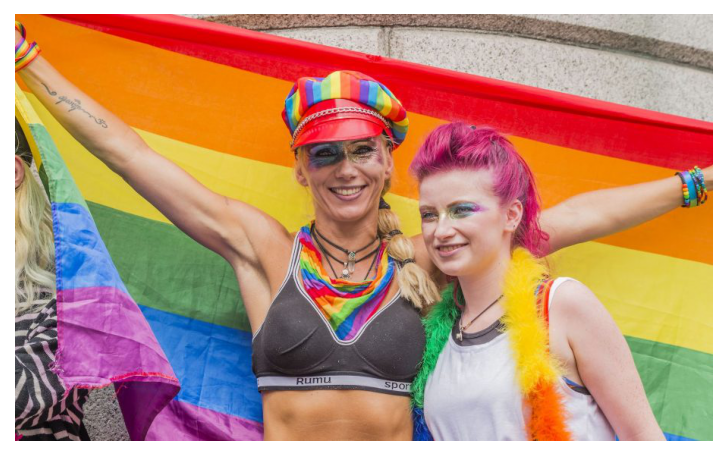

In [3]:
# Definimos RGB normalizado
if img.ravel().dtype not in (float, 'float32'): 
    print('Se normaliza la imagen.')
    img = img / 255.
if (len(img.shape)==3) and (img.shape[2]==4):
    img = RGBAtoRGB(img, verb=True)
print('Tamaño de la imagen:', img.shape) 

# Luminancias?
lum  = True if len(img.shape)==2 else False
if lum: print('Parece que la imagen no presenta colores.\n'+\
              'Se considera que es una imagen de luminancias.')

# Ploteo
plt.figure(dpi=150)
plt.axis('off')
plt.imshow(img)
plt.show()

# Procesamiento

## Obtención de Y

Para este práctico, se trabajará con las luminancias.

In [4]:
if not lum:                                     # Si tiene colores...
    YIQ = RGBtoYIQ(img, normed=True, verb=True) # Pasamos a YIQ
    Y   = YIQ[:,:,0]                            # Obtenemos Y
else: Y = img

Se ha transformado de RGB a YIQ


## Ploteo de histograma de luminancias

Se permite setear:
- Normalización de histograma _(Norm=True)_
- Bines
    - Ancho
    - Cantidad

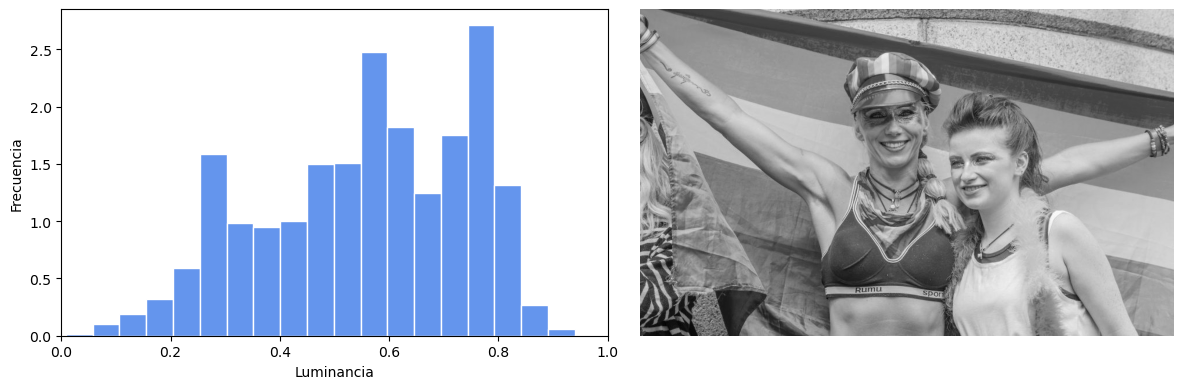

In [5]:
Norm = True
bins = 20

# Plot
plt.figure(dpi=100, figsize=(12, 4))
plt.subplot(1,2,1)
plt.hist(Y.ravel(), bins=bins, density=Norm,
         edgecolor='white', color='cornflowerblue')

plt.xlim(0,1)
plt.ylabel('Frecuencia')
plt.xlabel('Luminancia')
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(Y, plt.cm.gray)
plt.tight_layout()
plt.show()

## Manipulación de histograma de luminancias

La función ``ChangeY`` aplicar una cierta transformación a su input (Componente **Y**). La función a aplicar puede ser una función *built-in* (llamable, EJ.: np.mean, np.sqrt, etc.; tener en cuenta que se deberán introducir los argumentos necesarios), o el nombre de una de la siguiente lista:

  - ['raíz', 'sqrt'] -> Para raíz cuadrada: Y = sqrt(Y)

  - ['cuadrado', 'square'] -> Para elevar al cuadrado: Y = Y * Y

  - ['constante', 'constant'] -> Para multiplicar por una constante: Y = Y * c

        Se debe introducir como argumento el parámetro:
          c = <valor>

  - ['lineal', 'linear'] -> Para aplicar función lineal: Y = Y * a + b
        Se deben introducir como argumento los parámetros:
          a = <valor>
          b = <valor> 

  - ['potencia', 'power'] -> Para elevar a cierta potencia: Y = Y**p
  
        Se debe introducir como argumento el parámetro:
          p = <valor> (Potencia)

  - ['lineal_a_trozos', 'PiecewiseLinear'] -> Para aplicar función a trozos: (Ver ``PiecewiseLinear?``)

        Se deben introducir como argumento los parámetros:
          Y_min = <valor>
          Y_max = <valor>

In [6]:
Y_m = ChangeY(Y, 'lineal_a_trozos', Y_min=0.15, Y_max=0.75)

Se aplica la función: lineal_a_trozos


##### Transformación de imagen en YIQ al espacio RGB

In [7]:
if not lum:
    YIQ_m        = YIQ.copy()
    YIQ_m[:,:,0] = Y_m
    img_m        = YIQtoRGB(YIQ_m, normed=True, verb=True) # Volvemos a RGB normalizado
else:
    img_m = Y_m

Se ha transformado de YIQ a RGB


## Ploteo de histograma e imagen de luminancias modificadas (comparación)

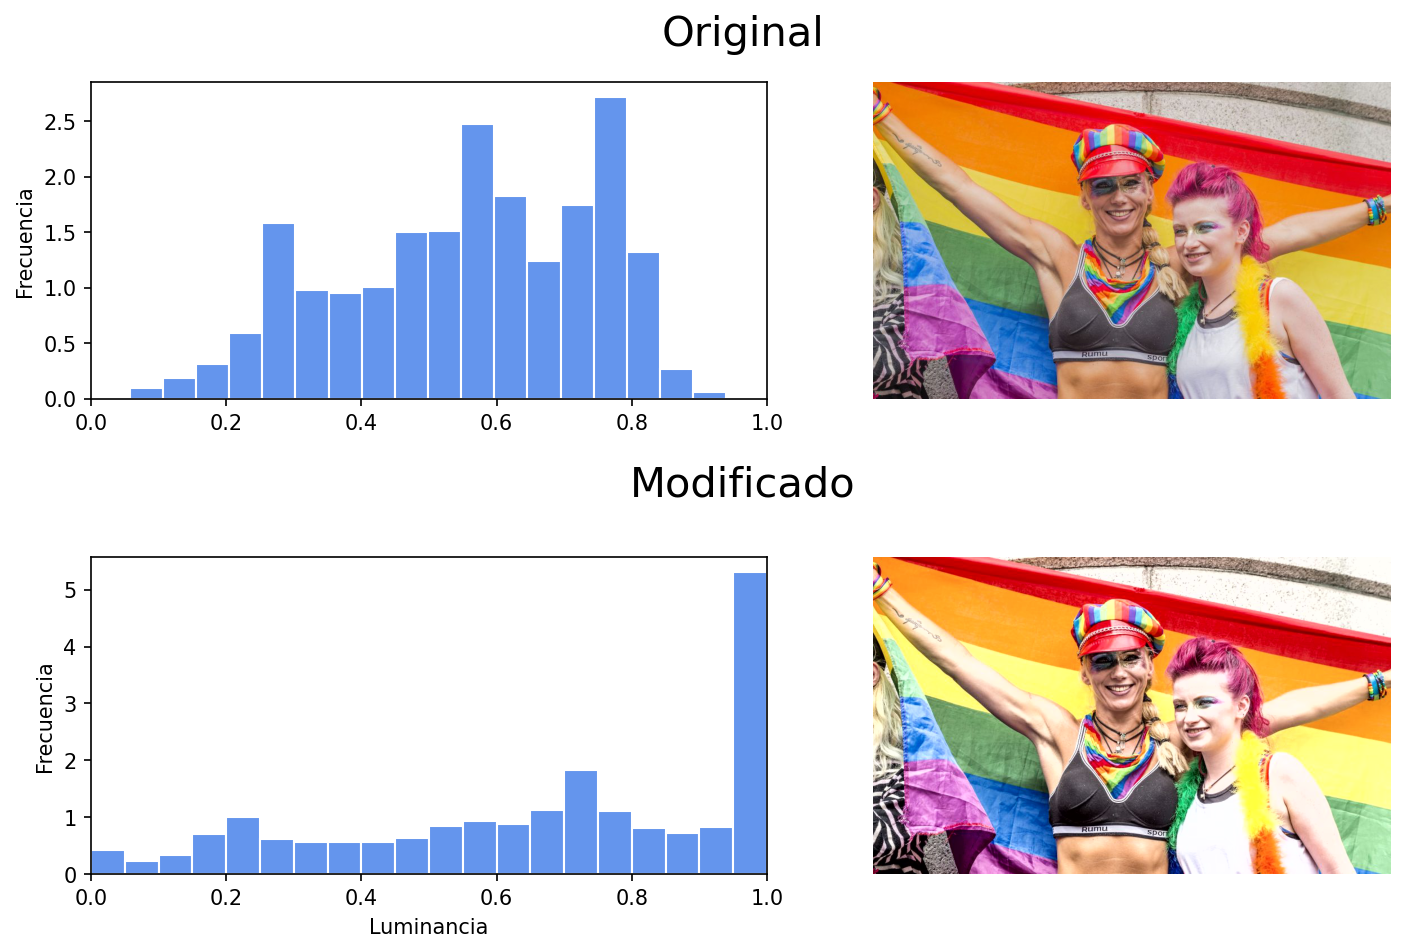

In [8]:
# Plot
plt.figure(dpi=150, figsize=(10, 6))
plt.subplot(2,2,1)
plt.figtext(0.5,1.05, "Original", ha="center", va="top", fontsize=20)

plt.hist(Y.ravel(), bins=bins, density=Norm,
         edgecolor='white', color='cornflowerblue')
plt.xlim(0,1)
plt.ylabel('Frecuencia')
plt.subplot(2,2,2)
plt.axis('off')
plt.imshow(img, plt.cm.gray)

plt.subplot(2,2,3)
plt.figtext(0.5,0.55, "Modificado", ha="center", va="top", fontsize=20)
plt.hist(Y_m.ravel(), bins=bins, density=Norm,
         edgecolor='white', color='cornflowerblue')
plt.xlim(0,1)
plt.ylabel('Frecuencia')
plt.xlabel('Luminancia')
plt.subplot(2,2,4)
plt.axis('off')
plt.imshow(img_m, plt.cm.gray)
plt.tight_layout()
plt.subplots_adjust(hspace = 0.5)
plt.show()

# Guardado

Se debe especificar el nombre y formato.

In [9]:
nombre  = 'IMG_Ej1.2'
formato = 'jpg'

if not in_colab:
    plt.imsave(nombre+'.'+formato,
               (img_m*255).astype('uint8'),
               cmap=plt.cm.gray)